In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [55]:
# Given the number of passengers (in units of thousands) this month, what is the number of passengers next month?

# We can write a simple function to convert our single column of data into a two-column dataset:

# the first column containing this month’s (t) passenger count and the 

# second column containing next month’s (t+1) passenger count, to be predicted.

In [56]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [59]:
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [60]:
np.random.seed(7)

In [61]:
dataframe = pd.read_csv('/content/gdrive/My Drive/RNN/AirPassengers.csv',usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

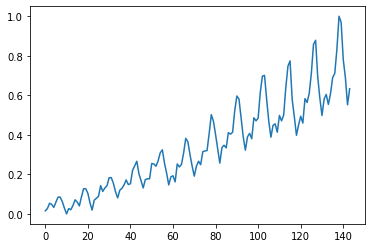

In [73]:
plt.plot(dataset)
plt.show()

In [62]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [63]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [64]:
# The function takes two arguments: the dataset, which is a NumPy array that we want to convert into a dataset,
# and the look_back, which is the number of previous time steps to use as input variables
# to predict the next time period — in this case defaulted to 1.

# This default will create a dataset where X is the number of passengers at a given time (t) and 
# Y is the number of passengers at the next time (t + 1).

In [65]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [66]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [67]:
# The LSTM network expects the input data (X) to be provided with a specific array structure in the form of: [samples, time steps, features].

# Currently, our data is in the form: [samples, features] and we are framing the problem as one time step for each sample. 

# We can transform the prepared train and test input data into the expected structure using numpy.reshape()

In [68]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [69]:
# There are three types of gates within a unit:
# Forget Gate: conditionally decides what information to throw away from the block.
# Input Gate: conditionally decides which values from the input to update the memory state.
# Output Gate: conditionally decides what to output based on input and the memory of the block.

In [70]:

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 2s - loss: 0.0361
Epoch 2/100
94/94 - 0s - loss: 0.0174
Epoch 3/100
94/94 - 0s - loss: 0.0136
Epoch 4/100
94/94 - 0s - loss: 0.0127
Epoch 5/100
94/94 - 0s - loss: 0.0116
Epoch 6/100
94/94 - 0s - loss: 0.0106
Epoch 7/100
94/94 - 0s - loss: 0.0097
Epoch 8/100
94/94 - 0s - loss: 0.0087
Epoch 9/100
94/94 - 0s - loss: 0.0077
Epoch 10/100
94/94 - 0s - loss: 0.0068
Epoch 11/100
94/94 - 0s - loss: 0.0059
Epoch 12/100
94/94 - 0s - loss: 0.0051
Epoch 13/100
94/94 - 0s - loss: 0.0044
Epoch 14/100
94/94 - 0s - loss: 0.0038
Epoch 15/100
94/94 - 0s - loss: 0.0034
Epoch 16/100
94/94 - 0s - loss: 0.0030
Epoch 17/100
94/94 - 0s - loss: 0.0026
Epoch 18/100
94/94 - 0s - loss: 0.0024
Epoch 19/100
94/94 - 0s - loss: 0.0023
Epoch 20/100
94/94 - 0s - loss: 0.0022
Epoch 21/100
94/94 - 0s - loss: 0.0021
Epoch 22/100
94/94 - 0s - loss: 0.0020
Epoch 23/100
94/94 - 0s - loss: 0.0021
Epoch 24/100
94/94 - 0s - loss: 0.0020
Epoch 25/100
94/94 - 0s - loss: 0.0020
Epoch 26/100
94/94 - 0s - loss: 0.

In [71]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22.66 RMSE
Test Score: 51.22 RMSE


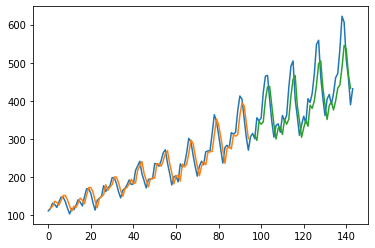

In [72]:

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()